In [69]:
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd
from scipy.signal import argrelextrema

In [21]:
maxr_df = pd.read_csv('maxr_df.csv')

In [22]:
maxr_df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2021-02-24,45.546429,45.599998,47.849998,44.740002,45.250000,1209100.0
1,2021-02-25,44.697426,44.750000,51.270000,44.250000,47.560001,2246700.0
2,2021-02-26,47.793785,47.849998,48.779999,44.070000,45.000000,1683400.0
3,2021-03-01,52.058769,52.119999,52.439999,48.250000,50.000000,1215600.0
4,2021-03-02,50.280865,50.340000,51.770000,50.150002,51.509998,745000.0


In [23]:
# Find local peaks
maxr_df['min'] = maxr_df.Close[(maxr_df.Close.shift(1) > maxr_df.Close) & (maxr_df.Close.shift(-1) > maxr_df.Close)]
maxr_df['max'] = maxr_df.Close[(maxr_df.Close.shift(1) < maxr_df.Close) & (maxr_df.Close.shift(-1) < maxr_df.Close)]                                  

<AxesSubplot:>

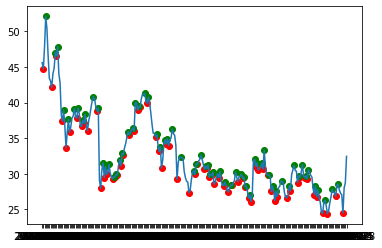

In [24]:
# Plot results
plt.scatter(maxr_df.Date, maxr_df['min'], c='r')
plt.scatter(maxr_df.Date, maxr_df['max'], c='g')
maxr_df.Close.plot()

In [25]:
# Find local peaks / values with noise reduction
n = 5
maxr_df['min_1'] = maxr_df.iloc[argrelextrema(maxr_df.Close.values, np.less_equal,
                    order=n)[0]]['Close']
maxr_df['max_1'] = maxr_df.iloc[argrelextrema(maxr_df.Close.values, np.greater_equal,
                    order=n)[0]]['Close']

<AxesSubplot:>

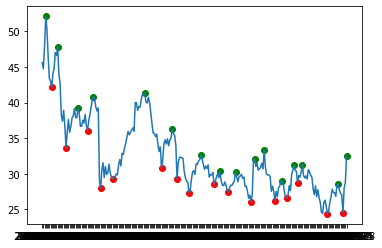

In [26]:
# Plot results
plt.scatter(maxr_df.Date, maxr_df['min_1'], c='r')
plt.scatter(maxr_df.Date, maxr_df['max_1'], c='g')
maxr_df.Close.plot()

In [27]:
maxr_df.head()

,Date,Adj Close,Close,High,Low,Open,Volume,min,max,min_1,max_1
0,2021-02-24,45.546429,45.599998,47.849998,44.740002,45.250000,1209100.0,NaN,NaN,NaN,NaN
1,2021-02-25,44.697426,44.750000,51.270000,44.250000,47.560001,2246700.0,44.75,NaN,NaN,NaN
2,2021-02-26,47.793785,47.849998,48.779999,44.070000,45.000000,1683400.0,NaN,NaN,NaN,NaN
3,2021-03-01,52.058769,52.119999,52.439999,48.250000,50.000000,1215600.0,NaN,52.119999,NaN,52.119999
4,2021-03-02,50.280865,50.340000,51.770000,50.150002,51.509998,745000.0,NaN,NaN,NaN,NaN


In [28]:
# isolate local max and mins with and without noise reduction
max_sr = [(row.Date, row.max_1) for row in maxr_df.itertuples() if row.max_1 > 0]
min_sr = [(row.Date, row.min_1) for row in maxr_df.itertuples() if row.min_1 > 0]
max_ = [(row.Date, row.max) for row in maxr_df.itertuples() if row.max > 0]
min_ = [(row.Date, row.min) for row in maxr_df.itertuples() if row.min > 0]

In [65]:
def levels(df, distance=3):
    # Get list of all minimum and maximum levels
    max_sr = [(row.Date, row.max_1) for row in df.itertuples() if row.max_1 > 0]
    min_sr = [(row.Date, row.min_1) for row in df.itertuples() if row.min_1 > 0]
    sr = sorted([[mx[1] for mx in max_sr]+[mn[1] for mn in min_sr]][0])
    
    # Init dictionary to store level strength
    sr_dict = {}
    
    # itereate through rows to establish and test levels
    for row in df.itertuples():
        for point in sr:
            if point in sr_dict:
                if row.Close <= (point-distance) and row.High >= (point-distance):
                    sr_dict[point] += 1
                elif row.Close <= (point+distance) and row.High >= (point+distance):
                    sr_dict[point] += 1
                elif row.Close >= (point-distance) and row.Low <= (point-distance):
                    sr_dict[point] += 1
                elif row.Close >= (point+distance) and row.Low <= (point+distance):
                    sr_dict[point] += 1
            else:
                sr_dict[point] = 0
    
    # Filter dictionary to only store levels that have been tested
    sr_dict = dict(filter(lambda val: val[0] > 1, sr_dict.items()))
    
    # Store the tested levels in a list
    sr = [level for level, strength in sr_dict.items()]
    
    # Return the levels and their strengths as a list and dictionary
    return sr, sr_dict

In [100]:
sr, sr_dict = levels(maxr_df, distance=10)

In [101]:
sr_dict

{24.350000381469727: 15,
 24.5: 15,
 26.06999969482422: 18,
 26.229999542236328: 19,
 26.600000381469727: 19,
 27.34000015258789: 17,
 27.420000076293945: 17,
 27.950000762939453: 22,
 28.5: 25,
 28.540000915527344: 25,
 28.75: 19,
 28.959999084472656: 19,
 29.209999084472656: 20,
 29.280000686645508: 19,
 30.229999542236328: 16,
 30.32999992370605: 14,
 30.780000686645508: 12,
 31.15999984741211: 5,
 31.290000915527344: 6,
 32.040000915527344: 4,
 32.439998626708984: 5,
 32.61000061035156: 4,
 33.34000015258789: 7,
 33.63999938964844: 9,
 36.04999923706055: 21,
 36.27000045776367: 23,
 39.220001220703125: 46,
 40.81999969482422: 49,
 41.290000915527344: 38,
 42.119998931884766: 21,
 47.84000015258789: 22,
 52.119998931884766: 4}

In [102]:
# Filters strength dictionary to only include levels above a strength level
sr = [level for level, strength in sr_dict.items() if strength > 10]

In [103]:
data = maxr_df.set_index(pd.to_datetime(maxr_df.Date))

In [104]:
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

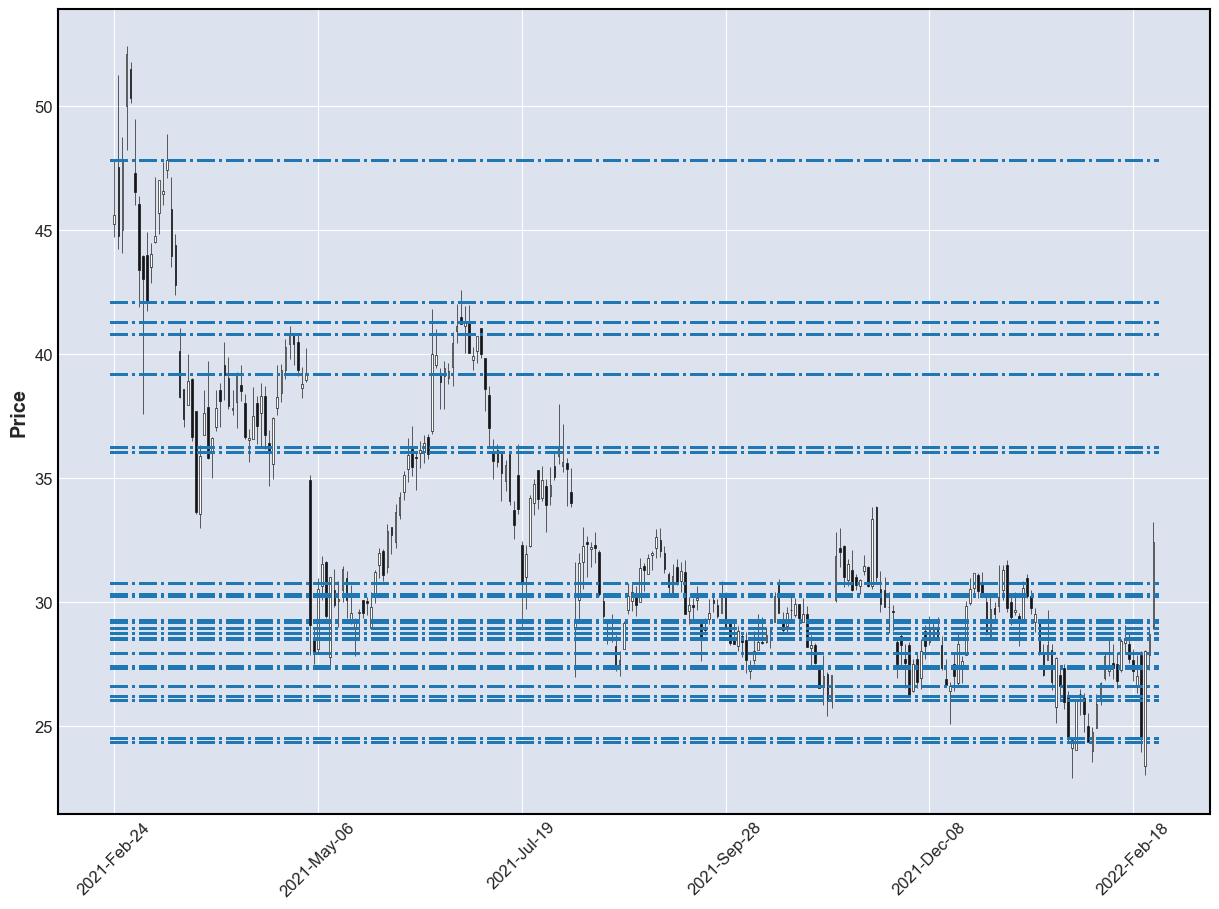

In [105]:
mpf.plot(data,hlines=dict(hlines=sr,linestyle='-.'),type='candle', figscale=2)